In [2]:
import stim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import OrderedDict, defaultdict
import scienceplots
plt.style.use('science')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[
    "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3",
    "#a6d854", "#ffd92f", "#e5c494", "#b3b3b3"
])
import seaborn as sns
sns.color_palette("colorblind")
# %matplotlib ipympl
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.cm as cm

In [3]:
from repetition_code.repetition_code_circuit import RepetitionCodeCircuit
from repetition_code.repetition_code_execute import RepetitionCodeExecute
from qiskit_ibm_runtime import QiskitRuntimeService

In [4]:
circuit = RepetitionCodeCircuit(3, 3, resets=False)
c = circuit.circuit['0']

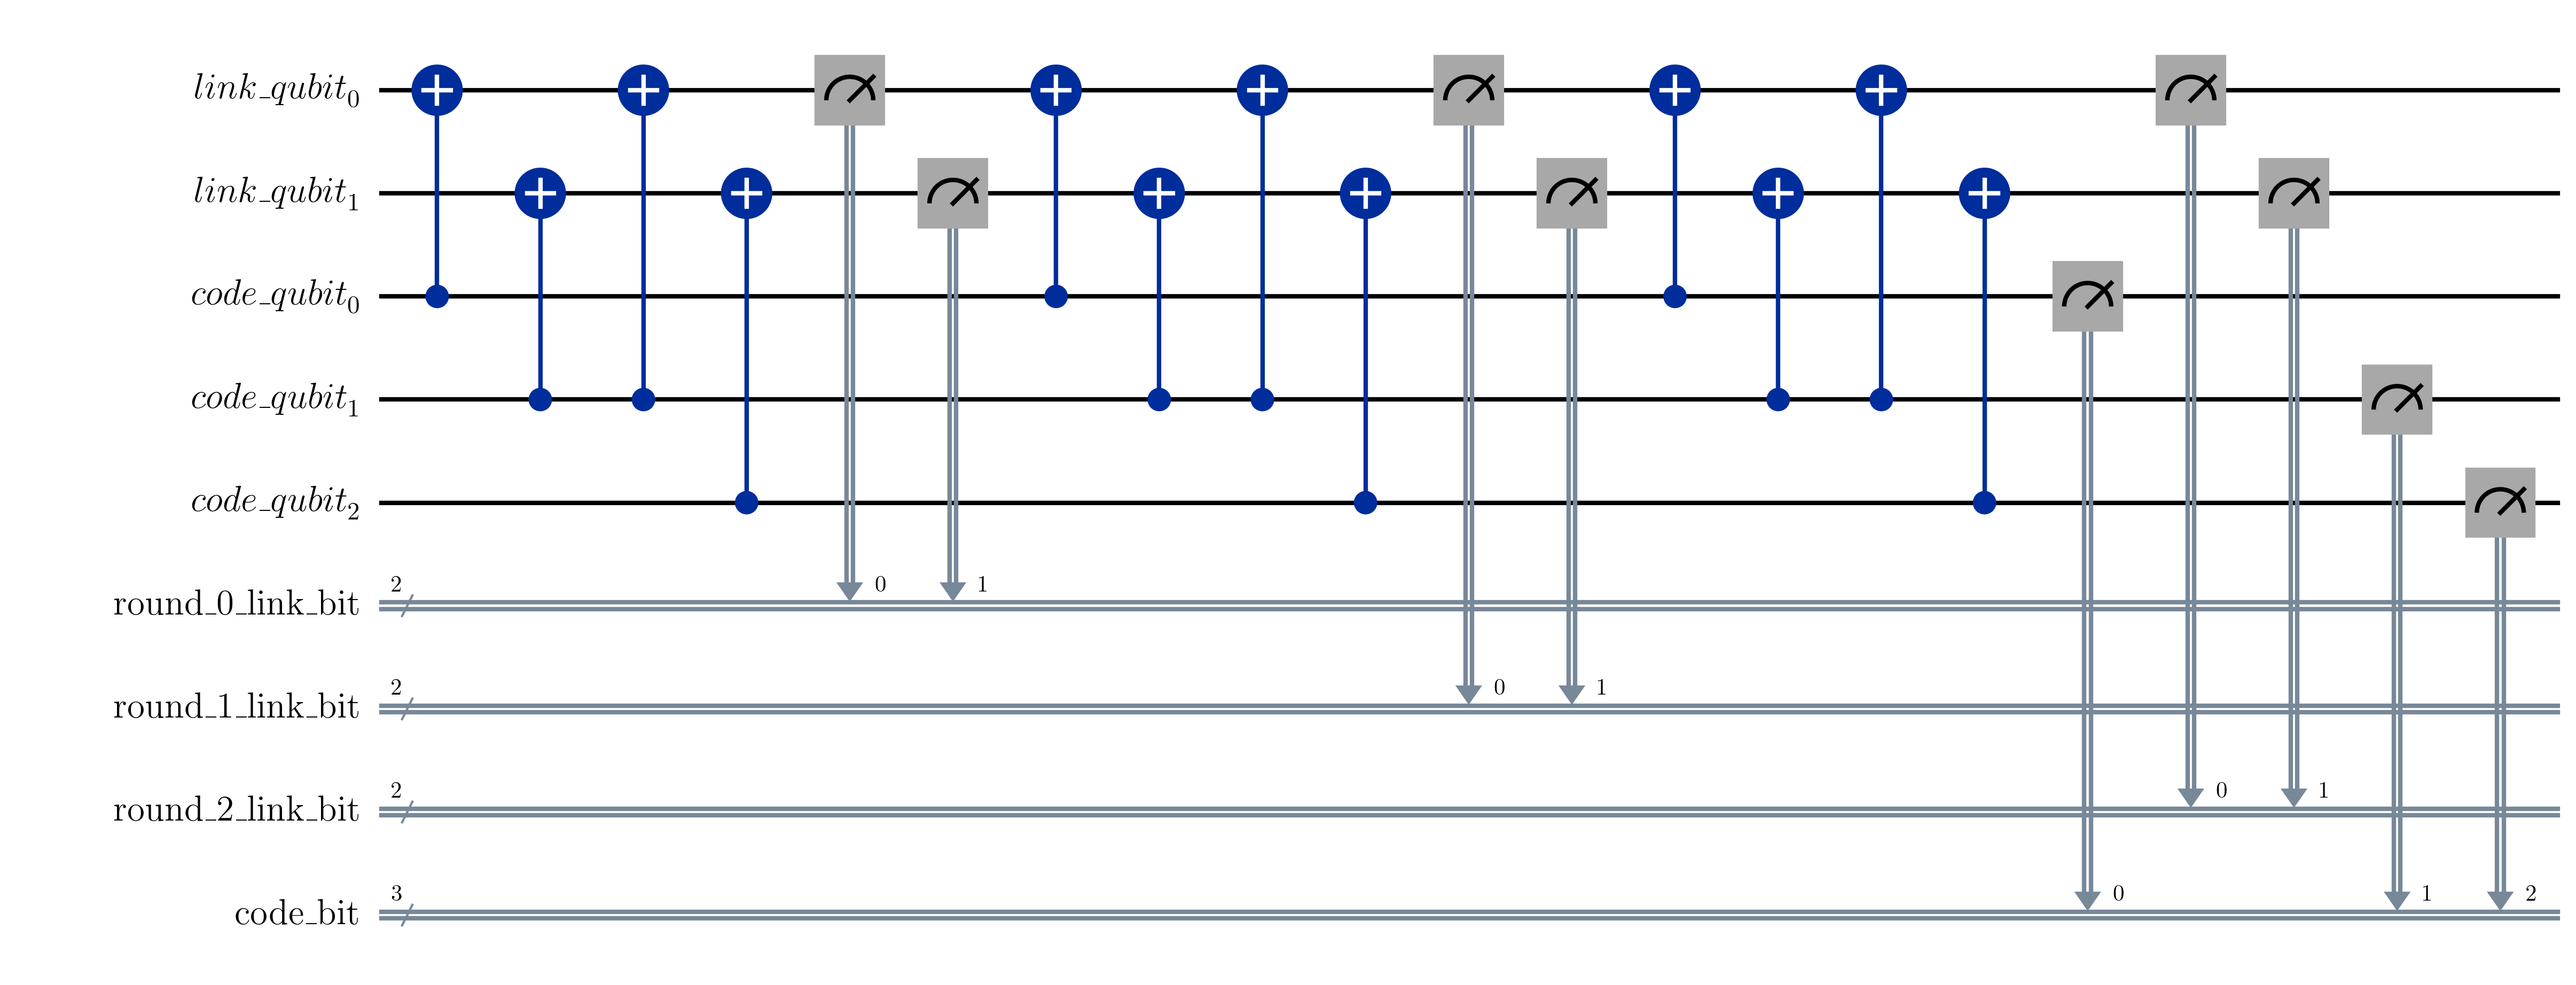

In [5]:
c.draw(output="mpl", filename="circuit_d3_dt3_no_reset.pdf")

In [6]:
qec = RepetitionCodeExecute(
        code_distance=3,
        time_steps=3,
        shots=100_000,                # Number of shots per run
        initial_state=0,               # Start in logical |0>
        simulator=False,               # Run on IBM-hardware
        noise_angle=0,       # Injected noise rotation
        backend_name="ibm_pittsburgh",
        subdir="/noise_angle"    # Output directory
    )

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-10-28 15:50:20,484: Default instance not set. Searching all available instances.


Connected to: ibm_pittsburgh, code distance: 3, time steps: 3, measurement type: classified


Physical layout: [13, 11, 14, 12, 18]


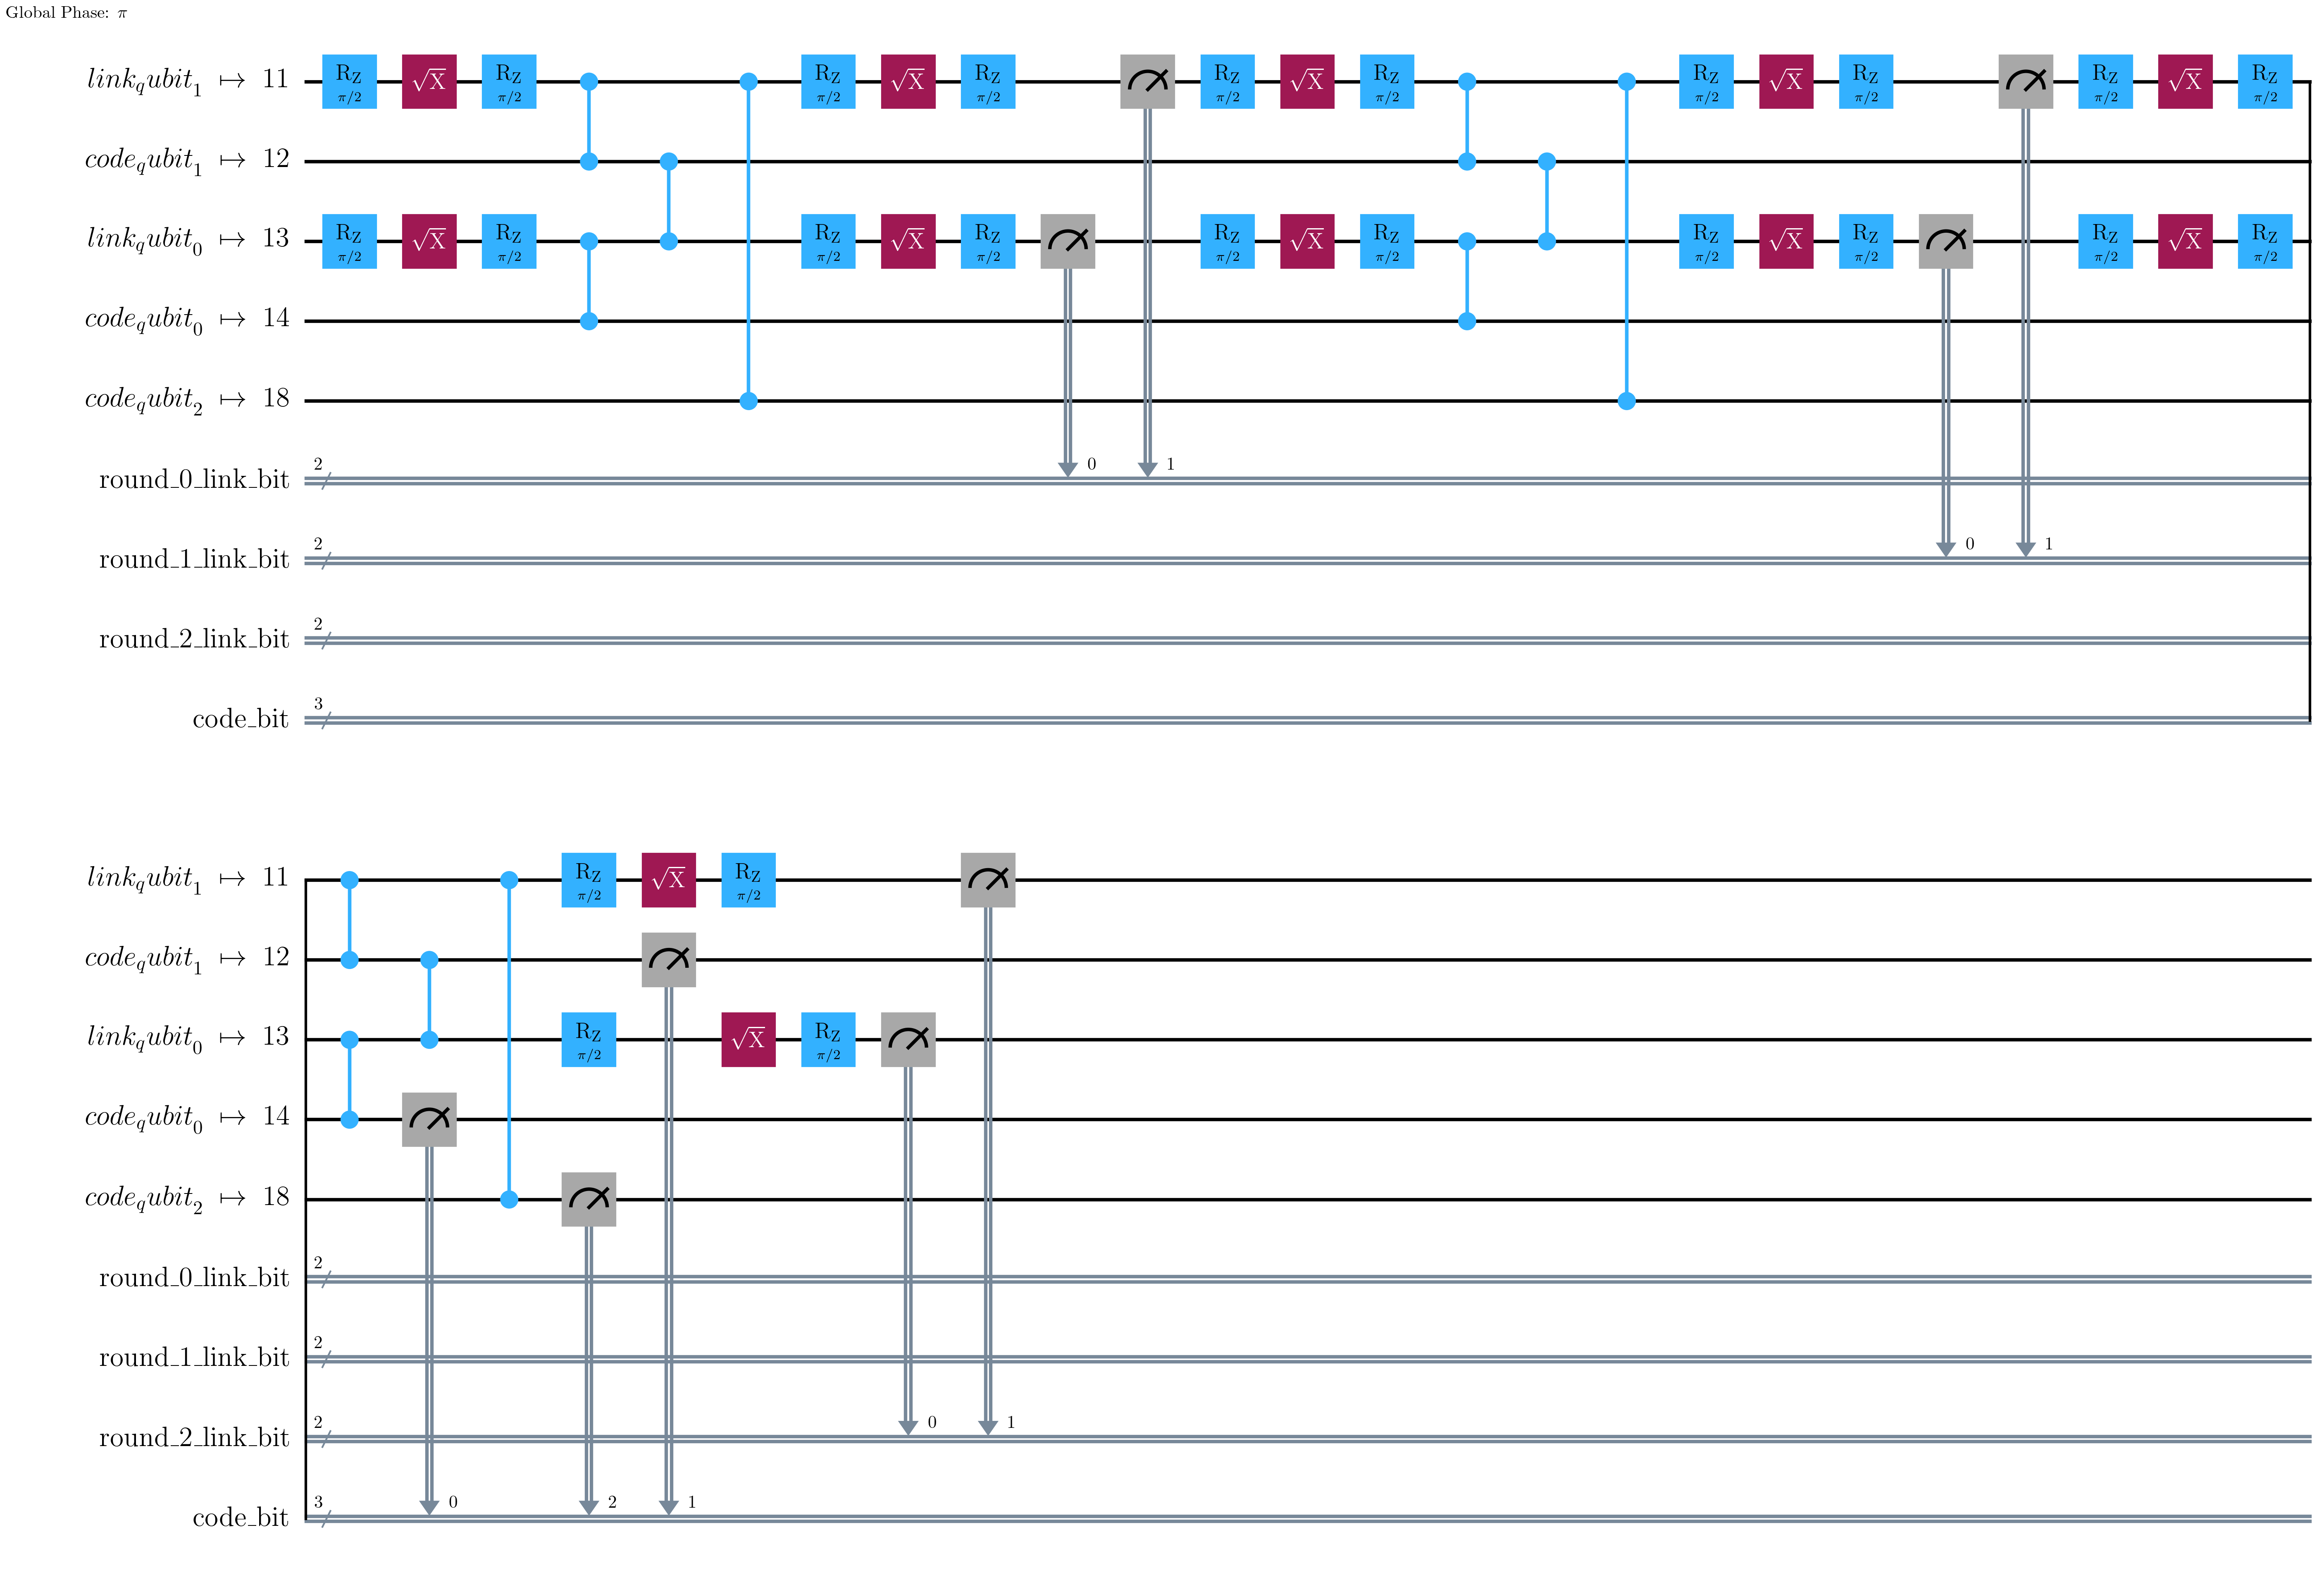

In [7]:
qec.transpile_circuit(c).draw(output="mpl", filename="circuit_d3_dt3_no_reset_native.pdf")

In [35]:
df["pdet"].head()
df.dtypes

distance    object
alpha       object
order       object
pdet        object
eps         object
eps_err     object
dtype: object

In [2]:
file_path = "/Users/xlmori/Desktop/QEC_GNN-RNN_IBM-main/data_analysis/data/data_pittsburgh_no_average.csv"
df = pd.read_csv(file_path)
df.head()

,distance,alpha,order,pdet,eps,eps_err
0,49,0.0000,25,0.109859,2.000020e-07,2.000029e-07
1,49,0.0827,25,0.112404,6.000176e-07,3.464253e-07
2,49,0.1653,25,0.128561,4.000078e-07,2.828510e-07
3,49,0.2480,25,0.128896,2.000020e-07,2.000029e-07
4,49,0.3307,25,0.143891,3.000441e-06,7.747664e-07


In [3]:
df['alpha'].unique()

array([0.    , 0.0827, 0.1653, 0.248 , 0.3307, 0.4134, 0.496 , 0.5787,
       0.6614, 0.7441, 0.8267, 0.9094, 0.9921, 1.0748, 1.1574, 1.2401,
       1.3228, 1.4054, 1.4881, 1.5708])

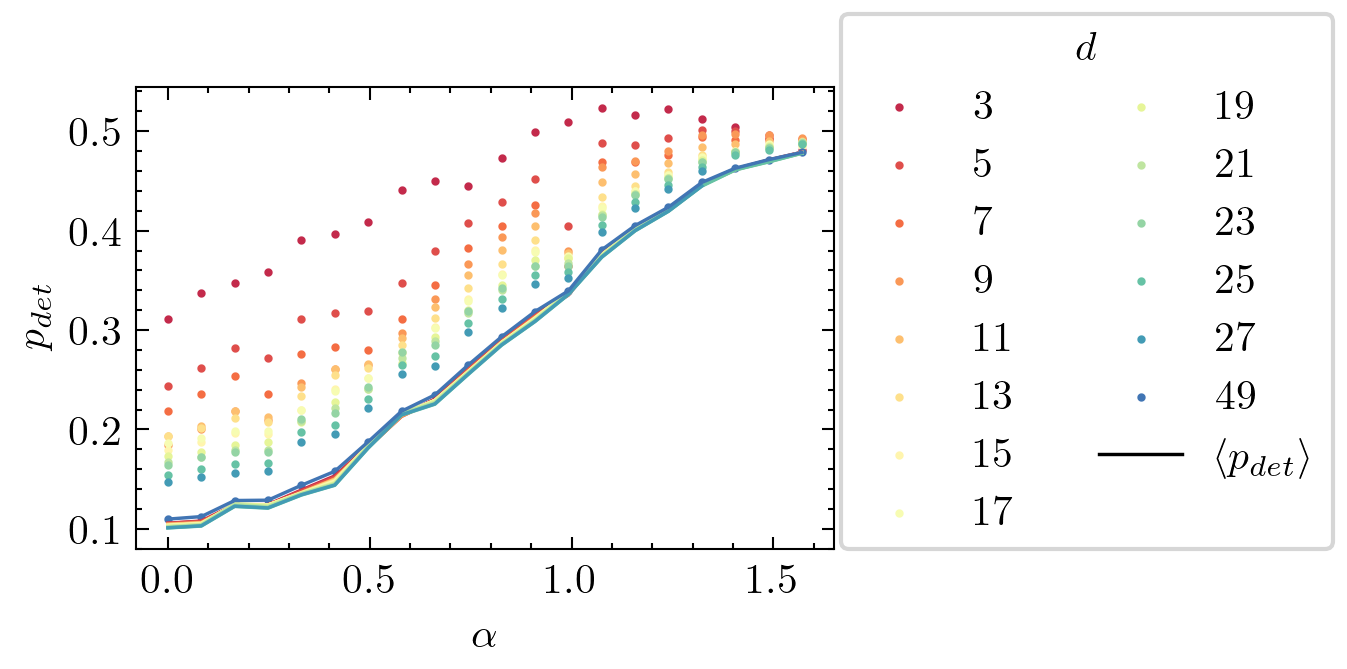

In [37]:
df_first = df.drop_duplicates(subset=["distance", "alpha"], keep="first")
df_mean = df.groupby(["distance", "alpha"], as_index=False)["pdet"].mean()
fig, ax = plt.subplots(figsize=(3,2))
# Get sorted distances
distances = sorted(df["distance"].unique())
# Create a color palette with one color per distance
palette = sns.color_palette("Spectral", n_colors=len(distances))
for color, d in zip(palette, distances):
    row = df_first[df_first["distance"] == d]
    ax.scatter(row["alpha"], row["pdet"], s=1, color=color, label=f"{d}")

for color, d in zip(palette, distances):
    group = df_mean[df_mean["distance"] == d]
    ax.plot(group["alpha"], group["pdet"], color=color, linewidth=.82)
ax.plot(0.2, 0.2, color ='black', label = r"$\langle p_{det}\rangle$", linewidth=.82)

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$p_{det}$")
ax.legend(title=r"$d$", loc = (1.01, 0), ncol=2, frameon=True)


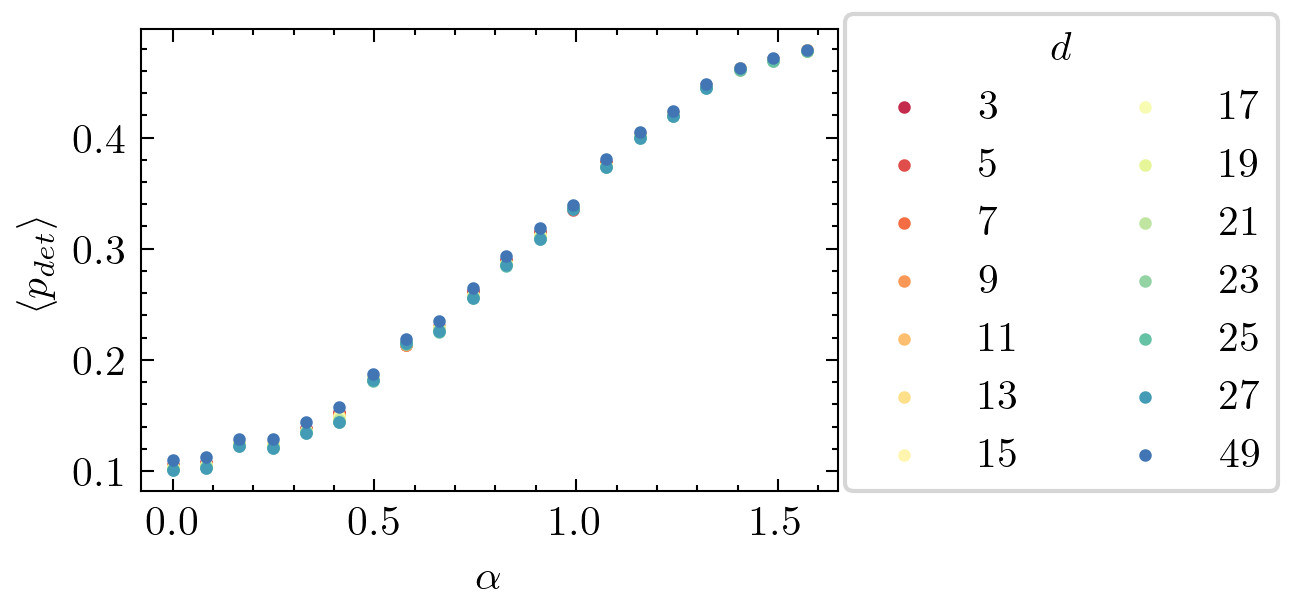

In [41]:
fig, ax = plt.subplots(figsize=(3,2))
distances = sorted(df["distance"].unique())
palette = sns.color_palette("Spectral", n_colors=len(distances))

for color, d in zip(palette, distances):
    group = df_mean[df_mean["distance"] == d]
    ax.scatter(group["alpha"], group["pdet"], s=4, color=color, label=f"{d}")  # averaged points
    # ax.plot(group["alpha"], group["pdet"], color=color, linewidth=.82)         # averaged curve

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\langle p_{det}\rangle$")
ax.legend(title=r"$d$", loc=(1.01, 0), ncol=2, frameon=True)
fig.savefig("pdet_vs_alpha_average.pdf", bbox_inches='tight')

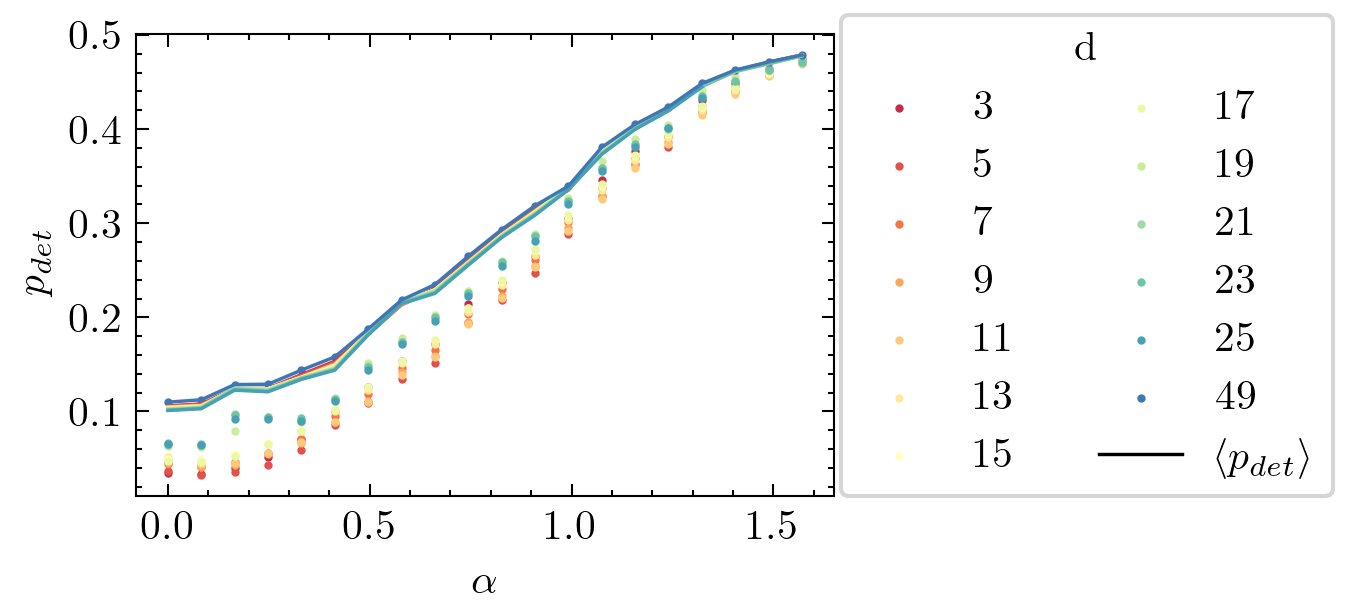

In [ ]:
df_first = df.drop_duplicates(subset=["distance", "alpha"], keep="last")
fig, ax = plt.subplots(figsize=(3,2))
for color, d in zip(palette, distances):
    row = df_first[df_first["distance"] == d]
    ax.scatter(row["alpha"], row["pdet"], s=1, color=color, label=f"{d}")

for color, d in zip(palette, distances):
    group = df_mean[df_mean["distance"] == d]
    ax.plot(group["alpha"], group["pdet"], color=color, linewidth=.82)
ax.plot(0.2, 0.2, color ='black', label = r"$\langle p_{det}\rangle$", linewidth=.82)

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$p_{det}$")
ax.legend(title="d", loc = (1.01, 0), ncol=2, frameon=True)


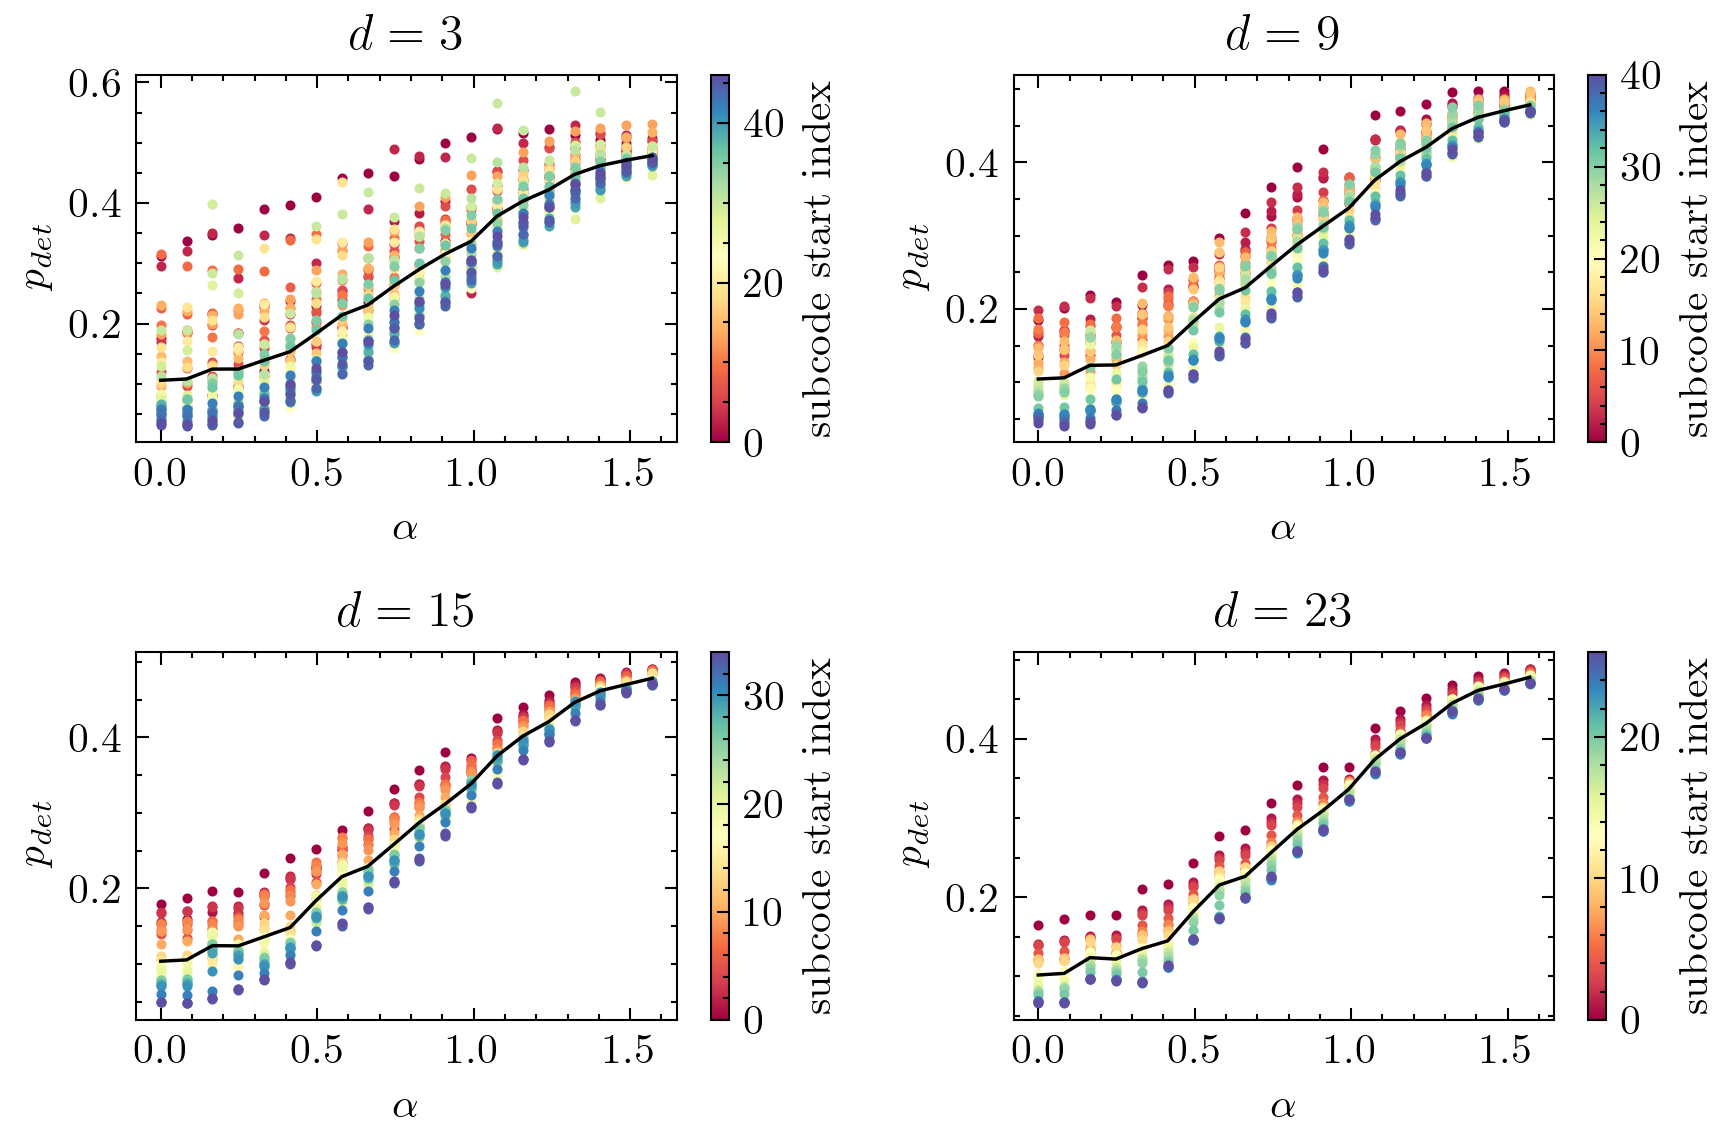

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(6, 4))
axs = ax.flatten()
for i, d_target in enumerate([3, 9, 15, 23]):
    df_one = df[df["distance"] == d_target]

    # We'll use a global colormap across all repeats
    max_repeats = df_one.groupby("alpha").size().max()
    cmap = cm.Spectral
    norm = mcolors.Normalize(vmin=0, vmax=max_repeats-1)

    group = df_mean[df_mean["distance"] == d_target]
    axs[i].plot(group["alpha"], group["pdet"], color ='black', label = r"$\langle p_{det}\rangle$", linewidth=.82)
    for alpha, group in df_one.groupby("alpha"):
        for idx, (_, row) in enumerate(group.iterrows()):
            axs[i].scatter(alpha, row["pdet"], color=cmap(norm(idx)), s=2)
    # Add colorbar for repeat index
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=axs[i], label="subcode start index")

    axs[i].set_xlabel(r"$\alpha$")
    axs[i].set_ylabel(r"$p_{det}$")
    axs[i].set_title(f"$d={d_target}$")
plt.tight_layout()
fig.savefig('p_det_vs_start_index.pdf')

Text(0.5, 1.0, 'd = 25, d_t = 25')

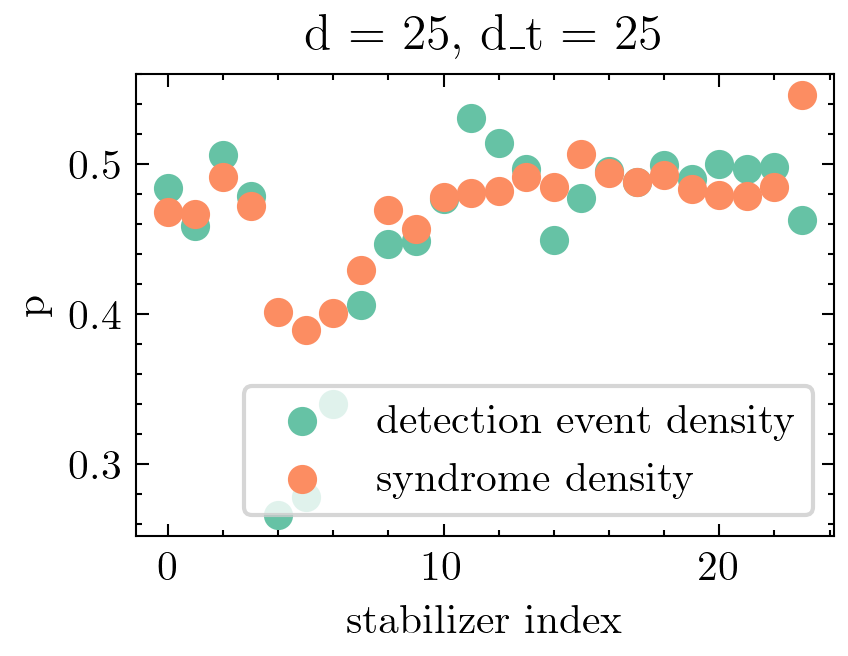

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))
ax.scatter(np.arange(24), [0.48410231, 0.45903577, 0.50607827, 0.4787525 , 0.26627846, 0.27843365,
 0.3400625 , 0.40627712, 0.446805  , 0.44927481, 0.47688346, 0.53076154,
 0.5139975 , 0.49706615, 0.4495825 , 0.477555  , 0.49576327, 0.48861346,
 0.49952558, 0.49021577, 0.50009615, 0.49727346, 0.49849846, 0.46274904], label = 'detection event density')
ax.scatter(np.arange(24), [0.46836481, 0.46673444, 0.49191481, 0.47205019, 0.40170593, 0.38951704,
 0.40070704, 0.42986296, 0.46970852, 0.45679167, 0.47841815, 0.48074352,
 0.48225852, 0.49181315, 0.48488407, 0.50676407, 0.49415833, 0.488215  ,
 0.49327389, 0.48331093, 0.47969704, 0.47871722, 0.48489574, 0.54632889], label = 'syndrome density')
ax.set_ylabel('p')
ax.set_xlabel('stabilizer index')
ax.legend(loc = 'lower right', frameon = True)
ax.set_title('d = 25, d_t = 25')

Text(0.5, 1.0, 'd = 25, d_t = 3')

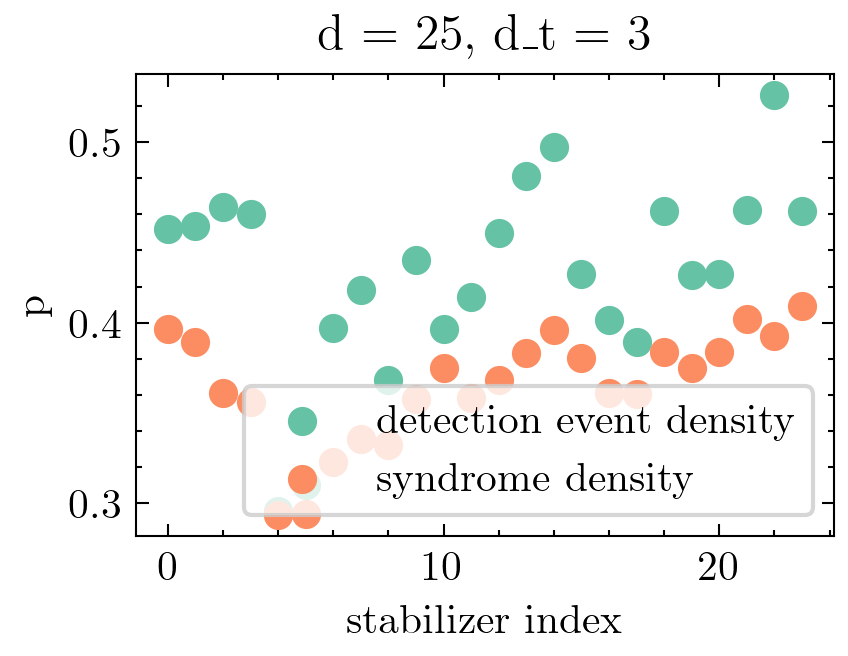

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))
ax.scatter(np.arange(24), [0.45166625, 0.45336188, 0.46385375, 0.46027812, 0.29557875, 0.31039125,
 0.39715937, 0.41803875, 0.36830563, 0.43459938, 0.39654375, 0.41447375,
 0.44950563, 0.48105687, 0.49723625, 0.427095  , 0.4013225 , 0.38959938,
 0.46175375, 0.42620125, 0.42722938, 0.46264187, 0.52608687, 0.46204   ], label = 'detection event density')
ax.scatter(np.arange(24), [0.3964465, 0.3895695, 0.361333 , 0.3562725, 0.293601 , 0.2942375,
 0.3227495, 0.3357275, 0.332552 , 0.357824 , 0.375183 , 0.3584525,
 0.368247 , 0.383319 , 0.3957595, 0.3807325, 0.360946 , 0.3607385,
 0.383921 , 0.3751265, 0.3840645, 0.402037 , 0.392554 , 0.409518 ], label = 'syndrome density')
ax.set_ylabel('p')
ax.set_xlabel('stabilizer index')
ax.legend(loc = 'lower right', frameon = True)
ax.set_title('d = 25, d_t = 3')